In [1]:
!nvidia-smi

Wed Jun 29 10:22:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.43.04    Driver Version: 515.43.04    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   48C    P5     7W /  N/A |    486MiB /  4096MiB |     41%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms , models 
from torchvision.utils import make_grid 
import os 
import random 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
train_transform = transforms.Compose([ 
    transforms.RandomRotation(10) ,   # rotate +/- 10 degrees 
    transforms.RandomHorizontalFlip(), # reverse 50% of the images 
    transforms.Resize(224) ,  # resize to 224x224 
    transforms.CenterCrop(224) ,  # center crop to 224x224 
    transforms.ToTensor() ,  # convert to tensor 
    transforms.Normalize([0.485, 0.456, 0.406] , [0.229, 0.224, 0.225])
])

# set train and test

In [6]:
dataset=datasets.ImageFolder(root=("./dandelion/Images"),transform=train_transform)
dataset

Dataset ImageFolder
    Number of datapoints: 1262
    Root location: ./dandelion/Images
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [7]:
class_names = dataset.classes
class_names

['dandelion', 'other']

In [8]:
train_indices , test_indices = train_test_split(
    list(range(len(dataset.targets))) , test_size=0.2 , stratify=dataset.targets
)
train_data=torch.utils.data.Subset(dataset , train_indices) 
test_data=torch.utils.data.Subset(dataset , test_indices)

In [9]:
print(len(train_data))
print(len(test_data))

1009
253


In [10]:
train_loader = DataLoader(train_data , batch_size=32 , shuffle=True) 
test_loader = DataLoader(test_data , batch_size=32 )

In [11]:
len(train_loader)

32

# images and labels

In [12]:
for images , labels in train_loader:
    break  

# print the labels 
print("Label: ",labels.numpy()) 
print('Class: ', *np.array([class_names[i] for i in labels])) 
im = make_grid(images , nrow=5)
im

Label:  [1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0]
Class:  other other other other dandelion other other other other dandelion other dandelion dandelion dandelion dandelion dandelion dandelion dandelion other dandelion dandelion dandelion other dandelion dandelion dandelion other dandelion other other dandelion dandelion


tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -2.1179,  ..., -2.1179,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -1.8610,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -2.0357,  ..., -2.0357,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -1.7556,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


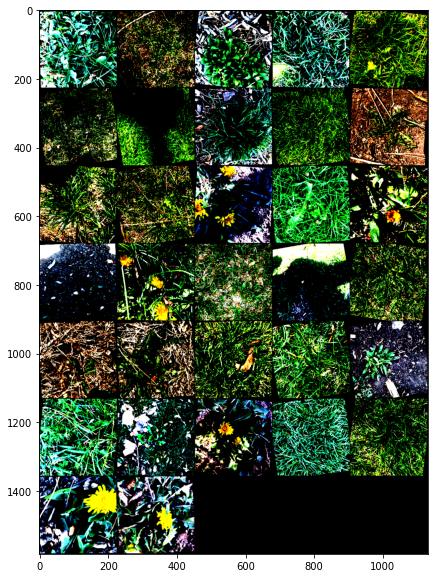

In [13]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.transpose(im.numpy() , (1,2,0)))

In [14]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229 , -0.456/0.224 , -0.406/0.225] ,
    std = [1/0.229 , 1/0.224 , 1/0.225]
) 
inv_normalize

Normalize(mean=[-2.1179039301310043, -2.0357142857142856, -1.8044444444444445], std=[4.366812227074235, 4.464285714285714, 4.444444444444445])

In [15]:
im = inv_normalize(im)
im

tensor([[[4.8500e-01, 4.8500e-01, 4.8500e-01,  ..., 4.8500e-01,
          4.8500e-01, 4.8500e-01],
         [4.8500e-01, 4.8500e-01, 4.8500e-01,  ..., 4.8500e-01,
          4.8500e-01, 4.8500e-01],
         [4.8500e-01, 4.8500e-01, 0.0000e+00,  ..., 0.0000e+00,
          4.8500e-01, 4.8500e-01],
         ...,
         [4.8500e-01, 4.8500e-01, 5.8824e-02,  ..., 4.8500e-01,
          4.8500e-01, 4.8500e-01],
         [4.8500e-01, 4.8500e-01, 4.8500e-01,  ..., 4.8500e-01,
          4.8500e-01, 4.8500e-01],
         [4.8500e-01, 4.8500e-01, 4.8500e-01,  ..., 4.8500e-01,
          4.8500e-01, 4.8500e-01]],

        [[4.5600e-01, 4.5600e-01, 4.5600e-01,  ..., 4.5600e-01,
          4.5600e-01, 4.5600e-01],
         [4.5600e-01, 4.5600e-01, 4.5600e-01,  ..., 4.5600e-01,
          4.5600e-01, 4.5600e-01],
         [4.5600e-01, 4.5600e-01, 5.3406e-08,  ..., 5.3406e-08,
          4.5600e-01, 4.5600e-01],
         ...,
         [4.5600e-01, 4.5600e-01, 6.2745e-02,  ..., 4.5600e-01,
          4.560

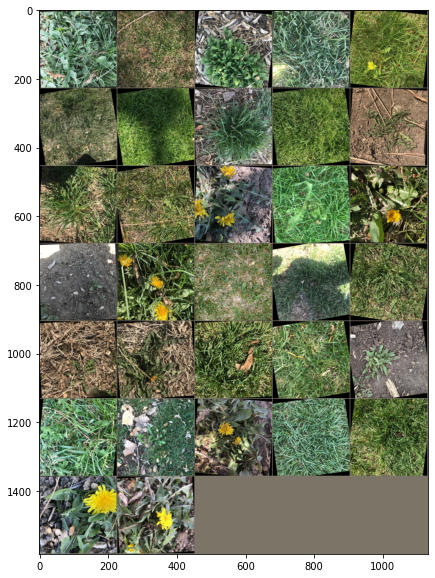

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

## CNN Model

In [17]:
class ConvolutionalNetwork(nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.conv1 = nn.Conv2d(3,6,3,1) 
        self.conv2 = nn.Conv2d(6,16,3,1) 
        self.fc1 = nn.Linear(16*54*54,120)
        self.fc2 = nn.Linear(120,84) 
        self.fc3 = nn.Linear(84,20)
        self.fc4 = nn.Linear(20,2) 
    
    def forward(self ,X):
        X = F.relu(self.conv1(X)) 
        X = F.max_pool2d(X , 2 , 2) 
        X = F.relu(self.conv2(X)) 
        X = F.max_pool2d(X , 2 , 2) 
        X = X.view(-1 , 16*54*54) 
        X = F.relu(self.fc1(X)) 
        X = F.relu(self.fc2(X)) 
        X = F.relu(self.fc3(X)) 
        X = self.fc4(X) 

        return F.log_softmax(X , dim=1)

In [24]:
CNNModel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(CNNModel.parameters() , lr=0.001)

In [19]:
CNNModel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=2, bias=True)
)

In [25]:
def count_parameters(model): 
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params: 
        print(f'{item:>8}') 
    print(f"____________\n{sum(params):>8}") 
count_parameters(CNNModel)

     162
       6
     864
      16
 5598720
     120
   10080
      84
    1680
      20
      40
       2
____________
 5611794


In [26]:
import time 
start_time = time.time() 
train_losses = [] 
test_losses = [] 
train_correct = []
test_correct = []
epochs = 5  

In [28]:
for i in range(epochs):
    trn_corr =0 
    tst_corr = 0 
    for b , (X_train , y_train) in enumerate(train_loader): 
        b+=1 
        y_pred = CNNModel(X_train)  
        loss = criterion(y_pred , y_train) 

        predicted = torch.max(y_pred , 1)[1] 
        batch_corr =  (predicted==y_train).sum() 
        trn_corr += batch_corr 

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()

        if b%200 ==0:
            print(f"epoch: {i} loss: {loss.item} batch: {b} accuracy: {trn_corr.item()*100/(10*b):7.3f}%") 
        
    loss = loss.detach().numpy() 
    train_losses.append(loss) 
    train_correct.append(trn_corr) 

    with torch.no_grad():
        for b , (X_test , y_test) in enumerate(test_loader): 
            y_val = CNNModel(X_test)
            loss = criterion(y_val , y_test) 
            predicted  = torch.max(y_val.data ,1)[1] 
            batch_cor = (predicted==y_test).sum() 
            tst_corr += batch_cor 
        
        loss = loss.detach().numpy() 
        test_losses.append(loss) 
        test_correct.append(tst_corr) 

print(f'\n Duration: {time.time() - start_time:.0f} seconds')       


 Duration: 989 seconds


# save model 

In [29]:
PATH = "cnn_model.pth" 

torch.save({ 
    "cnn_state_dict": CNNModel.state_dict(), 
    "optimizer_state_dict": optimizer.state_dict(),
},PATH)

In [30]:
# load checkpoints

In [31]:
checkpoint = torch.load(PATH)
CNNModel = ConvolutionalNetwork()
CNNModel.load_state_dict(checkpoint["cnn_state_dict"]) 
optimizer.load_state_dict(checkpoint["optimizer_state_dict"]) 

In [33]:
CNNModel.train()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=2, bias=True)
)

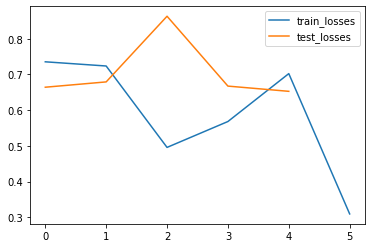

In [34]:
plt.plot(train_losses,label="train_losses")
plt.plot(test_losses,label="test_losses")
plt.legend()

# AlexNetModel

In [35]:
alexnetmodel= models.alexnet(pretrained=True) 
alexnetmodel

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/rohithnd/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [36]:
for param in alexnetmodel.parameters():
    param.requires_grad=False

torch.manual_seed(42)

alexnetmodel.classifier=nn.Sequential(nn.Linear(9216,1024),
                                     nn.ReLU(),
                                     nn.Dropout(p=0.5),
                                     nn.Linear(1024,2),
                                     nn.LogSoftmax(dim=1))
alexnetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, 

In [37]:
count_parameters(alexnetmodel)

 9437184
    1024
    2048
       2
____________
 9440258


In [38]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(alexnetmodel.classifier.parameters(),lr=0.001)

In [39]:
import time
start_time=time.time()
train_losses=[]
test_losses=[]
trn_correct=[]
tst_correct=[]
epochs=5

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1
        
        y_pred=alexnetmodel(X_train)
        loss=criterion(y_pred,y_train)       

        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        trn_corr+= batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
    
    loss=loss.detach().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)
                  
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            b+=1
                  
            y_val=alexnetmodel(X_test)
            predicted=torch.max(y_val.data,1)[1]
            btach_corr=(predicted==y_test).sum()
            tst_corr+=btach_corr

    loss=criterion(y_val,y_test)
    loss=loss.detach().numpy()
    test_losses.append(loss)
    test_correct.append(tst_corr)
                  
print(f'\nDuration: {time.time() - start_time:.0f} seconds')        


Duration: 829 seconds


In [40]:
PATH = "alexnet_model.pth" 

torch.save({ 
    "alexnetmodel_state_dict": alexnetmodel.state_dict(), 
    "alexnetmodel_optimizer_state_dict": optimizer.state_dict(),
},PATH)

In [3]:
PATH = "alexnet_model.pth" 
checkpoint = torch.load(PATH)
alexnetmodel = models.alexnet(pretrained=True)
alexnetmodel.load_state_dict(checkpoint["alexnetmodel_state_dict"]) 
optimizer.load_state_dict(checkpoint["alexnetmodel_optimizer_state_dict"]) 

RuntimeError: Error(s) in loading state_dict for AlexNet:
	Missing key(s) in state_dict: "classifier.1.weight", "classifier.1.bias", "classifier.4.weight", "classifier.4.bias", "classifier.6.weight", "classifier.6.bias". 
	Unexpected key(s) in state_dict: "classifier.0.weight", "classifier.0.bias", "classifier.3.weight", "classifier.3.bias". 

# Prediction

In [ ]:
x=100
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [ ]:
test_data[x][0].shape

In [ ]:
ConvolutionalNetwork.eval()
with torch.no_grad():
    new_pred=ConvolutionalNetwork(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

In [ ]:
alexnetmodel.eval()
with torch.no_grad():
    new_pred_1=alexnetmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')